In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
#import libraries 
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

In [3]:
# Building permits back to 9/3/2015
bp = pd.read_csv('data/Building_Permits_Issued.csv')

/home/michael/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Building Residential - New: Permit Type = CARN

Building Commercial - New: Permit Type = CACN

Residential Rehab: Permit Type = CARR

Commercial Rehab: Permit Type = CACR

Building Demolition: Permit Type = CADM

In [4]:
#building = bp.loc[bp['Permit Type Description'].str.contains('Building')]

In [5]:
#new_building = building.loc[building['Permit Type Description'].str.contains('New')]

In [6]:
# demolition = bp.loc[bp['Permit Type Description'].str.contains('Demolition')]

In [7]:
#res_demolition = demolition.loc[demolition['Permit Subtype Description'].str.contains('Residential')]

In [8]:
#merged = pd.merge(new_building, res_demolition, on= 'Address')

In [9]:
# Codes that we care about
new_commercial = ['CAA03R299', 'CAA03R301', 'CAA03R398', 'CAA03R399', 'CAA05R202']

In [10]:
# Codes that we care about
new_residential = ['CAA01R301', 'CAA02R302', 'CAA03R298', 'CAA03R299', 'CAA03R301', 'CAA03R398', 'CAA03R399', 'CAA04R301', 'CAA05R202', 'CAA08R301', 'CAA10R301', 'CAZ08A001', 'DPLX2CNDO']

In [11]:
# rehab_commercial = ['CAA02R302', 'CAA03R201', 'CAA03R298', 'CAA03R299', 'CAA03R301', 'CAA03R398', 'CAA03R399']

In [12]:
demolition_codes = ['CAZ01A001', 'CAZ01A002']

In [13]:
#commercial_rehab = bp.loc[(bp['Permit Type'] == 'CARR') & (bp['Permit Subtype'].isin(rehab_commercial))]

In [14]:
#commercial_rehab.shape

## I think we should match on parcel instead of address - sometimes the address changes!

In [15]:
#matched = pd.merge(bp.loc[bp['Permit Subtype'].isin(['CAZ01A001', 'CAZ01A002'])], new_building.loc[new_building['Permit Subtype'].isin(new_commercial + new_residential)], on = 'Address')

In [16]:
#matched.shape

In [17]:
# Residential Permits where one house was demolished and a new one was put up
res_rebuild = pd.merge(bp.loc[bp['Permit Subtype'] == 'CAZ01A001'], bp.loc[(bp['Permit Type'] == 'CARN') & (bp['Permit Subtype'].isin(new_residential))], on = 'Parcel')

In [18]:
# See for example how the address changes from 1000 Pennock Ave to 1000A Pennock Ave
res_rebuild.loc[res_rebuild['Address_x'] != res_rebuild['Address_y']].head()

,Permit #_x,Permit Type Description_x,Permit Subtype Description_x,Parcel,Date Entered_x,Date Issued_x,Const. Cost_x,Address_x,City_x,State_x,...,Zip_y,Subdivision/Lot_y,Contact_y,Permit Type_y,Permit Subtype_y,IVR Trk#_y,Purpose_y,Council Dist_y,Census Tract_y,Mapped Location_y
2,2016031224,Building Demolition Permit,Demolition Permit - Residential,08203030300,06/24/2016,06/24/2016,4000.0,1000 PENNOCK AVE,NASHVILLE,TN,...,37207,PT LOT 10 F E MANN PLAN,C & O Construction Co. Llc,CARN,CAA01R301,2104734,to rehab and convert existing 600 sf second fl...,5.0,37011800.0,"1000B PENNOCK AVE\nNASHVILLE, TN 37207\n(36.18..."
7,2018000610,Building Demolition Permit,Demolition Permit - Residential,09106027700,01/04/2018,01/04/2018,18000.0,5503 TENNESSEE AVE,NASHVILLE,TN,...,37209,LOT 1406 BLK 201 WEST NASH,"POTTER, ROGER CONSTRUCTION",CARN,CAA01R301,3453265,to construct a single family residence with 19...,20.0,37013300.0,"5503A TENNESSEE AVE\nNASHVILLE, TN 37209\n(36...."
14,201617075,Building Demolition Permit,Demolition Permit - Residential,09112002900,04/14/2016,04/14/2016,4000.0,4603A ILLINOIS AVE,NASHVILLE,TN,...,37209,LOT 506 BLK 85 W NASH PLAN NO 1,"BROADWAY BUILDING GROUP, LLC",CARN,CAA01R301,3249659,to construct 2037Sf single family residence wi...,20.0,37013300.0,"4603B ILLINOIS AVE\nNASHVILLE, TN 37209\n(36.1..."
21,2018008635,Building Demolition Permit,Demolition Permit - Residential,11616002800,02/14/2018,02/14/2018,10000.0,4001 COPELAND DR,NASHVILLE,TN,...,37215,LOT 21 SEC 2 EVERGREEN HEIGHTS,HISTORIC BUILDS LLC,CARN,CAA01R301,3466474,TO CONSTRUCT A NEW SINGLE FAMILY RES AT 5382 S...,34.0,37017901.0,"4006 DORCAS DR\nNASHVILLE, TN 37215\n(36.10765..."
31,201618625,Building Demolition Permit,Demolition Permit - Residential,09108021100,04/22/2016,05/02/2016,10000.0,4605 MICHIGAN AVE,NASHVILLE,TN,...,37209,LOT 7 BLK 2 WEST NASH. PLAN 1,LMS HOMES LLC,CARN,CAA01R301,3258738,TO CONSTRUCT A SINGLE FAMILY RESIDENCE WITH 20...,20.0,37013300.0,"4605B MICHIGAN AVE\nNASHVILLE, TN 37209\n(36.1..."


In [19]:
res_rebuild.groupby('Census Tract_y')['Permit #_x'].count().nlargest(5)

Census Tract_y
37013300.0    71
37013400.0    47
37019200.0    38
37012200.0    31
37017901.0    28
Name: Permit #_x, dtype: int64

In [20]:
res_rebuild.shape

(755, 39)

In [21]:
# Commerical demolitions plus new commercial
com_rebuild = pd.merge(bp.loc[bp['Permit Subtype'] == 'CAZ01A002'], bp.loc[(bp['Permit Type'] == 'CACN') & (bp['Permit Subtype'].isin(new_commercial))], on = 'Parcel')

In [22]:
com_rebuild.shape

(12, 39)

In [23]:
res_to_com = pd.merge(bp.loc[bp['Permit Subtype'] == 'CAZ01A001'],bp.loc[(bp['Permit Type'] == 'CACN') & (bp['Permit Subtype'].isin(new_commercial))], on = 'Parcel')

In [24]:
res_to_com.shape

(0, 39)

In [25]:
com_to_res = pd.merge(bp.loc[bp['Permit Subtype'] == 'CAZ01A002'], bp.loc[(bp['Permit Type'] == 'CARN') & (bp['Permit Subtype'].isin(new_residential))], on = 'Parcel')

In [26]:
com_to_res.shape

(6, 39)

In [27]:
bp.loc[(bp['Permit Type'] == 'CACN') & (bp['Permit Subtype'].isin(new_commercial))]

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Const. Cost,Address,City,State,Zip,Subdivision/Lot,Contact,Permit Type,Permit Subtype,IVR Trk#,Purpose,Council Dist,Census Tract,Mapped Location
1117,2017035608,Building Commercial - New,"Multifamily, Tri-Plex, Quad, Apartments",08600035500,05/31/2017,11/14/2017,3688764.0,5636 OLD HICKORY BLVD 401-428,HERMITAGE,TN,37076,E/S OLD HICKORY BV. N OF CENTAL PK,BACAR CONSTRUCTORS INC,CACN,CAA03R398,3371038,"To construct bldg. 5 of apartment complex. 34,...",12.0,37015623.0,"5636 OLD HICKORY BLVD 401-428\nHERMITAGE, TN 3..."
1602,2016040908,Building Commercial - New,"Multifamily, Tri-Plex, Quad, Apartments",18300001200,08/09/2016,08/25/2016,20597.0,13153 OLD HICKORY BLVD,ANTIOCH,TN,37013,E SIDE OLD HICKORY BLVD S OF INT HWY,david abbey,CACN,CAA03R398,3266284,To construct cabana's. for burkitt station pha...,33.0,37019114.0,"13153 OLD HICKORY BLVD\nANTIOCH, TN 37013\n(36..."
1863,2017035786,Building Commercial - New,"Multifamily, Tri-Plex, Quad, Apartments",09304013400,05/31/2017,12/14/2017,715977.0,401 KIRKPATRICK AVE,NASHVILLE,TN,37206,LOT 1 KIRKPATRICK PARK,"ANDERSON, R G CO INC",CACN,CAA03R398,3371323,"to construct 6,923SF bldg. H, 6 total units, f...",6.0,37019200.0,"401 KIRKPATRICK AVE\nNASHVILLE, TN 37206\n"
2505,2016065499,Building Commercial - New,"Multifamily, Apt / Twnhome > 5 Unit Bldg",128040A00800CO,11/23/2016,11/23/2016,48949.0,510 OLD HICKORY BLVD,NASHVILLE,TN,37209,LOT 1 THE LEXINGTON PHASE 1,"ZMANCO, LLC",CACN,CAA03R399,3297252,to construct a new grilling station with pergo...,22.0,37018202.0,"510 OLD HICKORY BLVD\nNASHVILLE, TN 37209\n(36..."
2989,2017050272,Building Commercial - New,"Multifamily, Tri-Plex, Quad, Apartments",05201014800,08/01/2017,11/09/2017,592088.0,501 FOREST PARK RD 901-904,MADISON,TN,37115,PT LOT 7 & 8 FOREST PARK ACREAGE TRACTS,"DEWEESE, CHARLES CONSTRUCTION COMPANY, INC",CACN,CAA03R398,3391902,"per master permit 201426793, to construct apar...",9.0,37010701.0,"501 FOREST PARK RD 901-904\nMADISON, TN 37115\..."
3060,2016040782,Building Commercial - New,"Multifamily, Tri-Plex, Quad, Apartments",18300001200,08/09/2016,08/25/2016,48283.0,13153 OLD HICKORY BLVD,ANTIOCH,TN,37013,E SIDE OLD HICKORY BLVD S OF INT HWY,david abbey,CACN,CAA03R398,3266135,To construct maintenance bldg. for burkitt sta...,33.0,37019114.0,"13153 OLD HICKORY BLVD\nANTIOCH, TN 37013\n(36..."
3095,2017004546,Building Commercial - New,"Multifamily, Condominium > 5 Unit Bldg",09311005700,01/20/2017,01/24/2017,5000.0,17 HERMITAGE AVE,NASHVILLE,TN,37210,PT LOT 71 RUTLEDGE,"ANDERSON, R G CO INC",CACN,CAA03R299,3312490,"DTC, MDHA-RH\nTo locate a 12 ft x 60 ft (720 s...",19.0,37019500.0,"17 HERMITAGE AVE\nNASHVILLE, TN 37210\n(36.156..."
3137,2017035546,Building Commercial - New,"Multifamily, Tri-Plex, Quad, Apartments",08600035500,05/31/2017,11/14/2017,6633290.0,5636 OLD HICKORY BLVD 301-363,HERMITAGE,TN,37076,E/S OLD HICKORY BV. N OF CENTAL PK,BACAR CONSTRUCTORS INC,CACN,CAA03R398,3370943,"To construct bldg. 4 of apartment complex. 61,...",12.0,37015623.0,"5636 OLD HICKORY BLVD 301-363\nHERMITAGE, TN 3..."
4888,2016029270,Building Commercial - New,"Multifamily, Apt / Twnhome > 5 Unit Bldg",08309018100,06/16/2016,03/22/2017,625636.0,105 S 11TH ST,NASHVILLE,TN,37206,PT LOTS 2 3 ARMSTRONG RESUB E EDGEFIELD,HARDCASTLE CONSTRUCTION CO INC,CACN,CAA03R399,3251116,to construct a new mixed used building with 2...,6.0,37019200.0,"105 S 11TH ST\nNASHVILLE, TN 37206\n(36.177187..."
5350,2017053676,Building Commercial - New,"Multifamily, Tri-Plex, Quad, Apartments",10505055000,08/15/2017,12/15/2017,15522452.0,1500 12TH AVE S,NASHVILLE,TN,37203,PT LOT 1 EDGEHILL EST. SEC. 121 & PT OF CL ROW,BACAR CONSTRUCTORS INC,CACN,CAA03R398,3396802,SP. Planning Department Review/approval prior ...,17.0,37016200.0,"1500 12TH AVE S\nNASHVILLE, TN 37203\n(36.1365..."


## Appraised Value Data

In [28]:
sf_2009 = pd.read_csv('data/2009SINGLEFAMILYSF.txt')
sf_2013 = pd.read_csv('data/2013SINGLEFAMILYSF.txt')
sf_2017 = pd.read_csv('data/2017SINGLEFAMILYSF.txt')

In [29]:
sf1 = pd.merge(sf_2009, sf_2013, on= 'AddressFullAddress', how = 'outer',suffixes = ('_f','_s'))
sf1.columns

sf1.rename(columns = {'FinishedArea_f' : '2009_FinishedArea', 'FinishedArea_s' : '2013_FinishedArea'}, inplace = True)

sf1['APN']= sf1['APN_f'].where(sf1['APN_s'].isnull(), sf1['APN_s'])
sf1['DistrictCode']= sf1['DistrictCode_f'].where(sf1['DistrictCode_s'].isnull(), sf1['DistrictCode_s'])
sf1['Council District']= sf1['Council District_f'].where(sf1['Council District_s'].isnull(), sf1['Council District_s'])
sf1['AddressCity']= sf1['AddressCity_f'].where(sf1['AddressCity_s'].isnull(), sf1['AddressCity_s'])
sf1['AddressPostalCode']= sf1['AddressPostalCode_f'].where(sf1['AddressPostalCode_s'].isnull(), sf1['AddressPostalCode_s'])
#sf1['FinishedArea']= sf1['FinishedArea_f'].where(sf1['FinishedArea_s'].isnull(), sf1['FinishedArea_s'])
sf1.columns

sf1.drop(['APN_f','DistrictCode_f','Council District_f','AddressCity_f',
          'AddressPostalCode_f','DistrictCode_s','Council District_s','AddressCity_s','APN_s','AddressPostalCode_s'], axis = 1,inplace = True)

final_sf = pd.merge(sf1, sf_2017,on= 'AddressFullAddress', how = 'outer', suffixes = ('_m','_n'),indicator = True)
final_sf.columns

final_sf.rename(columns = {'FinishedArea': '2017_FinishedArea'}, inplace = True)

final_sf['APN']= final_sf['APN_m'].where(final_sf['APN_n'].isnull(), final_sf['APN_n'])
final_sf['DistrictCode']= final_sf['DistrictCode_m'].where(final_sf['DistrictCode_n'].isnull(), final_sf['DistrictCode_n'])
final_sf['Council District']= final_sf['Council District_m'].where(final_sf['Council District_n'].isnull(), final_sf['Council District_n'])
final_sf['AddressCity']= final_sf['AddressCity_m'].where(final_sf['AddressCity_n'].isnull(), final_sf['AddressCity_n'])
final_sf['AddressPostalCode']= final_sf['AddressPostalCode_m'].where(final_sf['AddressPostalCode_n'].isnull(), final_sf['AddressPostalCode_n'])
#final_sf['FinishedArea']= final_sf['FinishedArea_m'].where(final_sf['FinishedArea_n'].isnull(), final_sf['FinishedArea_n'])


final_sf.drop(['APN_m','DistrictCode_m','Council District_m','AddressCity_m',
          'AddressPostalCode_m','DistrictCode_n','Council District_n','AddressCity_n','APN_n','AddressPostalCode_n'], axis = 1, inplace = True)
final_sf.columns

final_sf.drop_duplicates(keep ='first', inplace = True)

In [30]:
# #sf = pd.merge(pd.merge(sf2009, sf2013, on = 'AddressFullAddress', how = 'outer'), sf2017, on = 'AddressFullAddress', how = 'outer')

# sf.shape

# sf2017.head()

In [31]:
res_rebuild['Add'] = res_rebuild.Address_x.str.upper().str.replace(' ', '')
final_sf['Add'] = final_sf.AddressFullAddress.str.upper().str.replace(' ', '')

In [32]:
res_merged = pd.merge(res_rebuild, final_sf, on = 'Add', how = 'inner')

In [33]:
res_merged.shape

(639, 62)

In [34]:
# dummy = pd.merge(matched, sf, left_on = 'Address', right_on= 'AddressFullAddress')

# dummy.shape

# sf.shape

In [35]:
#matched.Address = matched.Address.str.replace(' ', '')

#sf.AddressFullAddress = sf.AddressFullAddress.str.replace(' ', '')

In [36]:
# dummy = pd.merge(matched, sf, left_on = 'Address', right_on= 'AddressFullAddress')

# dummy.shape

In [37]:
# dummy.loc[35]

In [38]:
# Percent change in appraised value from 2013 to 2017
final_sf['Pct_Change'] = (final_sf['2017 TOTAL APPR'] - final_sf['2013 TOTAL APPR']) / final_sf['2013 TOTAL APPR']
final_sf['Pct_Change_Overall'] = (final_sf['2017 TOTAL APPR'] - final_sf['2009 TOTAL APPR']) / final_sf['2009 TOTAL APPR']

In [39]:
final_sf.Pct_Change.describe()

count    183695.000000
mean          0.453751
std           0.466249
min          -0.967016
25%           0.263158
50%           0.364568
75%           0.506100
max          58.333333
Name: Pct_Change, dtype: float64

In [40]:
#dummy['Pct_Change'] = (dummy['2017 TOTAL APPR'] - dummy['2013 TOTAL APPR']) / dummy['2013 TOTAL APPR']

In [41]:
res_merged['Pct_Change'] = (res_merged['2017 TOTAL APPR'] - res_merged['2013 TOTAL APPR']) / res_merged['2013 TOTAL APPR']

In [42]:
res_merged.Pct_Change.describe()

count    453.000000
mean       1.427812
std        1.771488
min       -0.819005
25%        0.315013
50%        0.751958
75%        2.046776
max       12.150456
Name: Pct_Change, dtype: float64

In [43]:
#dummy['SF_Change'] = (dummy['FinishedArea'] - dummy['FinishedArea_y']) / dummy['FinishedArea_y']

In [44]:
final_sf['SF_Change'] = (final_sf['2017_FinishedArea'] - final_sf['2013_FinishedArea']) / final_sf['2013_FinishedArea']

In [45]:
final_sf['SF_Change_2013'] = (final_sf['2013_FinishedArea'] - final_sf['2009_FinishedArea']) / final_sf['2009_FinishedArea']

In [46]:
res_merged['SF_Change'] = (res_merged['2017_FinishedArea'] - res_merged['2013_FinishedArea']) / res_merged['2013_FinishedArea']

In [47]:
res_merged['SF_Change_2013'] = (res_merged['2013_FinishedArea'] - res_merged['2009_FinishedArea']) / res_merged['2009_FinishedArea']

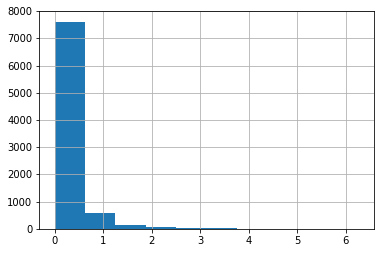

In [48]:
final_sf.loc[(final_sf.SF_Change_2013 < np.inf) & (final_sf.SF_Change_2013 > 0)].SF_Change_2013.hist()

In [49]:
res_merged.SF_Change.describe()

count    453.000000
mean       0.723616
std        1.296238
min       -1.000000
25%        0.000000
50%        0.693172
75%        1.611111
max        5.242424
Name: SF_Change, dtype: float64

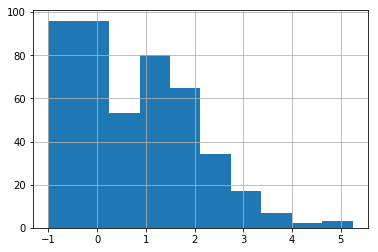

In [50]:
res_merged.SF_Change.hist()

## Tax (IRS) Data

In [51]:
tax_2016 = pd.read_csv('data/tax_2016.csv')

In [52]:
tax_2016.loc[tax_2016.STATE == 'TN']

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
145648,47,TN,0,1,1157130,744180,155040,238430,530230,1712970,...,558600,522223,0,0,0,0,100290,89421,1001430,2236485
145649,47,TN,0,2,759390,357060,217720,161400,347670,1486900,...,629270,1669930,0,0,0,0,104420,176829,646580,1784387
145650,47,TN,0,3,397080,129260,216320,42020,199330,881810,...,382830,2139366,0,0,0,0,87960,222529,302820,851164
145651,47,TN,0,4,241840,43660,182240,12240,125080,607500,...,239840,2147654,20,4,0,0,60840,201452,174980,577251
145652,47,TN,0,5,299360,32690,255470,7440,163150,810660,...,298430,5663671,1010,308,120,103,108580,617348,178600,739209
145653,47,TN,0,6,95980,7300,84010,1090,70060,276890,...,95910,12461171,51840,127030,51390,214690,46560,1412055,33300,632320
145654,47,TN,37010,1,820,580,160,70,370,1120,...,360,307,0,0,0,0,90,73,630,979
145655,47,TN,37010,2,470,210,160,70,200,950,...,380,1066,0,0,0,0,70,119,390,1208
145656,47,TN,37010,3,360,80,230,40,170,880,...,340,1903,0,0,0,0,90,315,260,864
145657,47,TN,37010,4,310,40,260,20,160,880,...,300,2473,0,0,0,0,80,211,230,883


In [53]:
council_district = gpd.read_file('data/Council_District_Outlines.geojson')

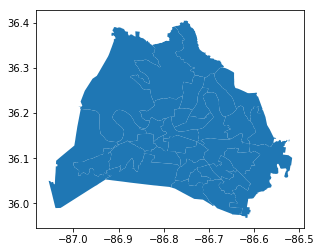

In [54]:
council_district.plot()

In [55]:
zip_codes = gpd.read_file('data/Zip_Codes.geojson')

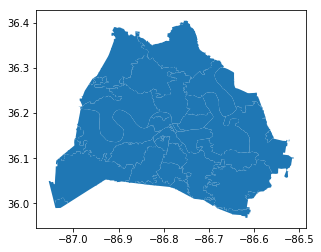

In [56]:
zip_codes.plot()

In [57]:
zc_db = gpd.sjoin(council_district, zip_codes, how="inner", op='intersects')

In [58]:
zc_db.groupby('district').zip.count()

district
1      9
10     4
11     3
12     4
13     6
14     4
15     7
16     4
17     5
18     7
19    11
2      4
20     3
21     6
22     3
23     4
24     3
25     5
26     4
27     3
28     3
29     4
3      6
30     2
31     7
32     2
33     6
34     6
35     9
4      9
5      6
6      6
7      4
8      3
9      4
Name: zip, dtype: int64

In [59]:
zip_code_list = list(zip_codes.zip.unique())

In [60]:
tax_2016 = tax_2016.loc[tax_2016.zipcode.isin(zip_code_list)]

In [61]:
tax_2016.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
145666,47,TN,37013,1,16260,10580,1930,3460,6890,25320,...,8860,9518,0,0,0,0,2110,2291,13750,32237
145667,47,TN,37013,2,14900,7470,3260,3670,5670,30520,...,11970,33215,0,0,0,0,2180,4100,12670,36063
145668,47,TN,37013,3,6040,2310,2580,960,2380,13670,...,5730,32050,0,0,0,0,1290,3598,4710,13191
145669,47,TN,37013,4,2670,630,1760,230,1100,6620,...,2640,24401,0,0,0,0,660,2531,1980,6320
145670,47,TN,37013,5,2270,340,1820,100,1050,5920,...,2270,40013,0,0,0,0,880,4789,1370,5129


In [62]:
# Income data from the IRS
by_return = tax_2016.pivot(index = 'zipcode', columns = 'agi_stub', values = 'N1')

In [63]:
by_return.head()

agi_stub,1,2,3,4,5,6
zipcode,,,,,,
37013,16260,14900,6040,2670,2270,210
37015,2960,2460,1350,770,700,120
37027,6420,3240,2590,2160,5970,6510
37064,7240,4550,2960,2480,5900,3230
37072,4890,4120,2270,1440,1730,390


In [64]:
by_return['Total'] = 12.5 * by_return[1] + 37.5 * by_return[2] + 62.5 * by_return[3] + 87.5 * by_return[4] + 150 * by_return[5] + 250 * by_return[6]

In [65]:
by_return.head()

agi_stub,1,2,3,4,5,6,Total
zipcode,,,,,,,
37013,16260,14900,6040,2670,2270,210,1766125.0
37015,2960,2460,1350,770,700,120,416000.0
37027,6420,3240,2590,2160,5970,6510,3075625.0
37064,7240,4550,2960,2480,5900,3230,2355625.0
37072,4890,4120,2270,1440,1730,390,840500.0


In [66]:
by_return['Household'] = by_return[[1, 2, 3, 4, 5, 6]].sum(axis = 1)

In [67]:
# Approximate per household income by zip code
by_return['Per_Household'] = by_return.Total / by_return.Household

In [68]:

by_return.nsmallest(10, 'Per_Household')

agi_stub,1,2,3,4,5,6,Total,Household,Per_Household
zipcode,,,,,,,,,
37210,3560,2120,770,320,220,40,243125.0,7030,34.583926
37207,9170,5740,2060,840,720,70,657625.0,18600,35.356183
37217,6910,5570,1950,700,530,50,570375.0,15710,36.306493
37115,7980,6280,2180,900,670,100,675750.0,18110,37.313639
37218,3220,2090,820,420,370,60,277125.0,6980,39.702722
37228,400,330,140,40,60,0,38625.0,970,39.819588
37208,4260,2300,900,400,500,170,348250.0,8530,40.826495
37013,16260,14900,6040,2670,2270,210,1766125.0,42350,41.703070
37086,6230,5610,2430,1220,870,70,694875.0,16430,42.293061


## Mortgage Payments

In [69]:
final_sf.columns

Index(['AddressFullAddress', '2009 LAND', '2009 IMPR', '2009 TOTAL APPR',
       '2009 TOTAL ASSD', '2009_FinishedArea', '2013 LAND', '2013 IMPR',
       '2013 TOTAL APPR', '2013 TOTAL ASSD', '2013_FinishedArea', '2017 LAND',
       '2017 IMPR', '2017 TOTAL APPR', '2017 TOTAL ASSD', '2017_FinishedArea',
       '_merge', 'APN', 'DistrictCode', 'Council District', 'AddressCity',
       'AddressPostalCode', 'Add', 'Pct_Change', 'Pct_Change_Overall',
       'SF_Change', 'SF_Change_2013'],
      dtype='object')

In [70]:
final_sf.shape

(201851, 27)

In [168]:
# Mortgage payment calculation
r = 0.04 #Annual interest rate
y = 30 #Length of mortgage (years)
n = 12*y # Number of monthly payments
d = 0.05 # Down payment percentage
final_sf['Mortgage_Per_Year_2009'] = 12* (1-d)*final_sf['2009 TOTAL APPR'] * r/12 *(1+r/12)**n / ((1+r/12)**n -1)
final_sf['Mortgage_Per_Year_2013'] = 12* (1-d)*final_sf['2013 TOTAL APPR'] * r/12 *(1+r/12)**n / ((1+r/12)**n -1)
final_sf['Mortgage_Per_Year_2017'] = 12* (1-d)*final_sf['2017 TOTAL APPR'] * r/12 *(1+r/12)**n / ((1+r/12)**n -1)

In [72]:
r = 0.05 #Annual interest rate
y = 30 #Length of mortgage (years)
n = 12*y # Number of monthly payments
d = 0.05 # Down payment percentage
(1-d)*200000 * r/12 *(1+r/12)**n / ((1+r/12)**n -1)

1019.9610837230656

In [73]:
# Total number of single family homes in 2017
final_sf['2017 TOTAL APPR'].count()

197589

In [74]:
#Percent of Affordable Homes in 2017
final_sf.loc[final_sf.Mortgage_Per_Year_2017 < 12240].AddressFullAddress.count()/final_sf['2017 TOTAL APPR'].count()

0.5566757258754282

In [75]:
#Percent of affordable homes in 2009
final_sf.loc[final_sf.Mortgage_Per_Year_2009 < 11550].AddressFullAddress.count()/final_sf['2009 TOTAL APPR'].count()

0.7346639112464651

In [76]:
final_sf.loc[final_sf.Mortgage_Per_Year_2017 < 12240].AddressFullAddress.count()

109993

In [77]:
# Change in the number of affordable homes from 2009 to 2017
final_sf.loc[final_sf.Mortgage_Per_Year_2009 < 11550].AddressFullAddress.count() - final_sf.loc[final_sf.Mortgage_Per_Year_2017 < 12240].AddressFullAddress.count()

25097

In [78]:
hi_2017 = pd.read_csv('data/Household_Income/ACS_16_5YR_S1901_with_ann.csv')

In [79]:
hi_2017.head()

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,HC03_MOE_VC01,HC04_EST_VC01,...,HC04_EST_VC19,HC04_MOE_VC19,HC01_EST_VC20,HC01_MOE_VC20,HC02_EST_VC20,HC02_MOE_VC20,HC03_EST_VC20,HC03_MOE_VC20,HC04_EST_VC20,HC04_MOE_VC20
0,Id,Id2,Geography,Households; Estimate; Total,Households; Margin of Error; Total,Families; Estimate; Total,Families; Margin of Error; Total,Married-couple families; Estimate; Total,Married-couple families; Margin of Error; Total,Nonfamily households; Estimate; Total,...,Nonfamily households; Estimate; PERCENT ALLOCA...,Nonfamily households; Margin of Error; PERCENT...,Households; Estimate; PERCENT ALLOCATED - Nonf...,Households; Margin of Error; PERCENT ALLOCATED...,Families; Estimate; PERCENT ALLOCATED - Nonfam...,Families; Margin of Error; PERCENT ALLOCATED -...,Married-couple families; Estimate; PERCENT ALL...,Married-couple families; Margin of Error; PERC...,Nonfamily households; Estimate; PERCENT ALLOCA...,Nonfamily households; Margin of Error; PERCENT...
1,0500000US47037,47037,"Davidson County, Tennessee",269078,1484,150156,1797,100268,1914,118922,...,(X),(X),(X),(X),(X),(X),(X),(X),30.9,(X)


In [80]:
# Number of affordable single family homes by zipcode
# REMOVE HOUSES THAT DON'T EXIST!
#sf_2017.loc[(sf2017.Mortgage_Per_Year < 12240) & (sf2017['2017 IMPR'] > 0)].groupby('AddressPostalCode').AddressFullAddress.count().sort_values()

In [81]:
#sf_2017.loc[(sf2017.Mortgage_Per_Year < 12240) & (sf2017['2017 IMPR'] >= 0) & (sf2017.AddressPostalCode == 37122)].head()

## Census Data

In [82]:
income_2016 = pd.read_csv('data/Census_Data/ACS_16_5YR_S1901/ACS_16_5YR_S1901_with_ann.csv')

In [83]:
households = [col for col in list(income_2016.columns) if 'HC01_EST_VC' in col and col <= 'HC01_EST_VC11' and col > 'HC01_EST_VC01']

In [84]:
income_2016.loc[:,households]

,HC01_EST_VC02,HC01_EST_VC03,HC01_EST_VC04,HC01_EST_VC05,HC01_EST_VC06,HC01_EST_VC07,HC01_EST_VC08,HC01_EST_VC09,HC01_EST_VC10,HC01_EST_VC11
0,"Households; Estimate; Less than $10,000","Households; Estimate; $10,000 to $14,999","Households; Estimate; $15,000 to $24,999","Households; Estimate; $25,000 to $34,999","Households; Estimate; $35,000 to $49,999","Households; Estimate; $50,000 to $74,999","Households; Estimate; $75,000 to $99,999","Households; Estimate; $100,000 to $149,999","Households; Estimate; $150,000 to $199,999","Households; Estimate; $200,000 or more"
1,2.3,4.8,4.3,8.7,9.6,25.0,18.4,17.2,2.6,7.0
2,3.4,2.6,12.3,12.6,14.7,16.8,11.8,20.9,2.9,2.1
3,8.3,4.3,9.3,7.1,17.4,21.6,13.8,13.3,2.2,2.6
4,8.1,2.0,12.8,11.5,18.6,22.4,10.4,13.5,0.6,0.0
5,2.0,6.3,9.2,7.7,12.7,26.7,17.2,13.7,2.6,1.7
6,4.8,4.9,5.8,3.0,14.6,33.9,12.6,12.4,5.9,2.1
7,7.9,8.9,11.1,9.2,16.2,16.9,14.4,10.9,3.9,0.5
8,5.1,10.7,13.0,13.8,18.1,17.3,10.5,8.8,2.4,0.4
9,6.9,2.7,14.4,20.6,11.4,21.2,12.9,9.5,0.0,0.5


In [85]:
# Minimum income amounts for each bracket
min_income = [0, 10000, 15000, 25000, 35000, 50000, 75000, 100000, 150000, 200000]

In [86]:
# Middle income in each bracket - use to approximate income
mid_income = []
for i in range(len(min_income) -1):
    mid_income.append((min_income[i] + min_income[i+1]) / 2)
mid_income.append(250000)

In [87]:
# Maximum housing cost (30% of income)
max_cost = np.array(min_income) * .3

In [88]:
max_cost

array([    0.,  3000.,  4500.,  7500., 10500., 15000., 22500., 30000.,
       45000., 60000.])

In [89]:
income_2016.loc[1, households].astype(float).cumsum()

HC01_EST_VC02     2.3
HC01_EST_VC03     7.1
HC01_EST_VC04    11.4
HC01_EST_VC05    20.1
HC01_EST_VC06    29.7
HC01_EST_VC07    54.7
HC01_EST_VC08    73.1
HC01_EST_VC09    90.3
HC01_EST_VC10    92.9
HC01_EST_VC11    99.9
Name: 1, dtype: float64

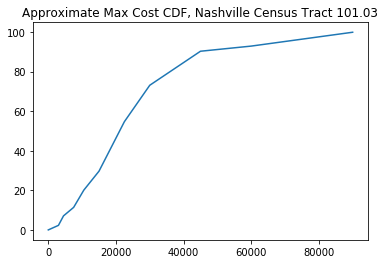

In [90]:
x = np.append(max_cost, [90000])
y = [0] + list(income_2016.loc[1, households].astype(float).cumsum())

_ = plt.plot(x,y)
_ = plt.title('Approximate Max Cost CDF, Nashville Census Tract 101.03')

In [91]:
dictionary = dict(zip(households, mid_income))

In [92]:
dictionary

{'HC01_EST_VC02': 5000.0,
 'HC01_EST_VC03': 12500.0,
 'HC01_EST_VC04': 20000.0,
 'HC01_EST_VC05': 30000.0,
 'HC01_EST_VC06': 42500.0,
 'HC01_EST_VC07': 62500.0,
 'HC01_EST_VC08': 87500.0,
 'HC01_EST_VC09': 125000.0,
 'HC01_EST_VC10': 175000.0,
 'HC01_EST_VC11': 250000}

In [93]:
gross_rent = pd.read_csv('data/Census_Data/ACS_16_5YR_B25063/ACS_16_5YR_B25063_with_ann.csv')

In [94]:
cash_rent = [col for col in list(gross_rent.columns) if 'HD01_VD' in col and col >= 'HD01_VD03']

In [95]:
housing_cost = pd.read_csv('data/Census_Data/ACS_16_5YR_B25104/ACS_16_5YR_B25104_with_ann.csv')

In [96]:
housing_cost.head()

,GEO.id,GEO.id2,GEO.display-label,HD01_VD01,HD02_VD01,HD01_VD02,HD02_VD02,HD01_VD03,HD02_VD03,HD01_VD04,...,HD01_VD13,HD02_VD13,HD01_VD14,HD02_VD14,HD01_VD15,HD02_VD15,HD01_VD16,HD02_VD16,HD01_VD17,HD02_VD17
0,Id,Id2,Geography,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - Less than $100,Margin of Error; Total: - Less than $100,Estimate; Total: - $100 to $199,Margin of Error; Total: - $100 to $199,Estimate; Total: - $200 to $299,...,"Estimate; Total: - $1,500 to $1,999","Margin of Error; Total: - $1,500 to $1,999","Estimate; Total: - $2,000 to $2,499","Margin of Error; Total: - $2,000 to $2,499","Estimate; Total: - $2,500 to $2,999","Margin of Error; Total: - $2,500 to $2,999","Estimate; Total: - $3,000 or more","Margin of Error; Total: - $3,000 or more",Estimate; Total: - No cash rent,Margin of Error; Total: - No cash rent
1,1400000US47037010103,47037010103,"Census Tract 101.03, Davidson County, Tennessee",993,54,0,12,10,11,59,...,114,34,67,42,33,22,35,25,27,26
2,1400000US47037010104,47037010104,"Census Tract 101.04, Davidson County, Tennessee",1223,84,0,12,15,18,58,...,105,55,38,28,7,10,8,12,54,64
3,1400000US47037010105,47037010105,"Census Tract 101.05, Davidson County, Tennessee",1642,95,0,12,13,14,80,...,163,78,113,54,40,28,26,20,36,45
4,1400000US47037010106,47037010106,"Census Tract 101.06, Davidson County, Tennessee",999,59,0,12,0,12,73,...,161,56,17,19,21,18,7,10,6,8


In [97]:
categories = [col for col in list(housing_cost.columns) if 'HD01_VD' in col and col >= 'HD01_VD02' and col <= 'HD01_VD16']

In [98]:
categories

['HD01_VD02',
 'HD01_VD03',
 'HD01_VD04',
 'HD01_VD05',
 'HD01_VD06',
 'HD01_VD07',
 'HD01_VD08',
 'HD01_VD09',
 'HD01_VD10',
 'HD01_VD11',
 'HD01_VD12',
 'HD01_VD13',
 'HD01_VD14',
 'HD01_VD15',
 'HD01_VD16']

In [99]:
min_rent = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500, 3000]) * 12

In [100]:
min_rent

array([    0,  1200,  2400,  3600,  4800,  6000,  7200,  8400,  9600,
       10800, 12000, 18000, 24000, 30000, 36000])

In [101]:
list(100 * housing_cost.loc[1, categories].astype(float).cumsum() / housing_cost.loc[1, categories].astype(float).sum())

[0.0,
 1.0351966873706004,
 7.142857142857143,
 12.422360248447205,
 24.94824016563147,
 34.47204968944099,
 36.749482401656316,
 41.09730848861284,
 42.028985507246375,
 46.480331262939956,
 74.22360248447205,
 86.0248447204969,
 92.96066252587991,
 96.3768115942029,
 100.0]

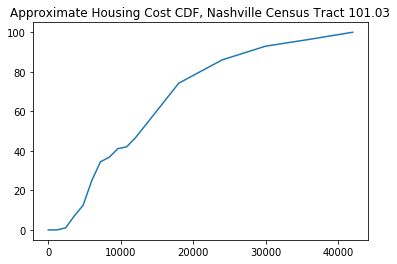

In [102]:
x = np.append(min_rent, [3500 * 12])
y = [0] + list(100 * housing_cost.loc[1, categories].astype(float).cumsum() / housing_cost.loc[1, categories].astype(float).sum())

_ = plt.plot(x,y)
_ = plt.title('Approximate Housing Cost CDF, Nashville Census Tract 101.03')

In [103]:
def findy(x1, y1, x2, y2, x):
    '''Find the y value at x for a line through (x1, y1), (x2, y2)'''
    m = (y2 - y1)/(x2 - x1)
    y = m*(x - x1) + y1
    return y

def area(x1, y1, x2, y2):
    '''Find the area between two piecewise linear curves.
    Note: x1 and x2 must start and end at the same values'''
    x = sorted(list(set(x1 + x2))) #Get a common set of x-values
    h1 = np.zeros(len(x))
    h2 = np.zeros(len(x))
    h = np.zeros(len(x))
    f1 = dict(zip(x1, y1))
    f2 = dict(zip(x2, y2))
    for i in range(len(x)):
        if x[i] in x1:
            h1[i] = y1[x1.index(x[i])]
        else:
            h1[i] = findy(max([_ for _ in x1 if _ < x[i]]),  f1[max([_ for _ in x1 if _ < x[i]])],min([_ for _ in x1 if _ > x[i]]), f1[min([_ for _ in x1 if _ > x[i]])], x[i])
        if x[i] in x2:
            h2[i] = y2[x2.index(x[i])]
        else:
            h2[i] = findy(max([_ for _ in x2 if _ < x[i]]),  f2[max([_ for _ in x2 if _ < x[i]])],min([_ for _ in x2 if _ > x[i]]), f2[min([_ for _ in x2 if _ > x[i]])], x[i])
        h[i] = h1[i] - h2[i]
    
    area = 0
    for i in range(len(x) -1):
        area += 0.5 * (x[i+1] - x[i]) * (h[i] + h[i+1])
    return area
    

Compare housing demand (% of low-income households in a census tract) vs supply (% of low-housing cost households in a tract). Based on census data.

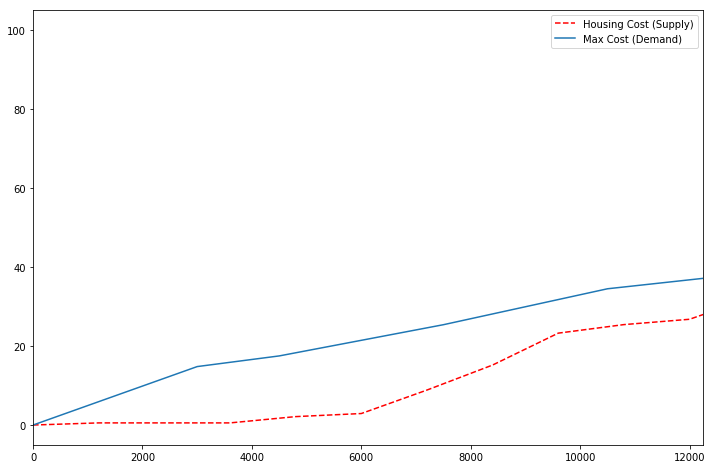

In [104]:
i = 158

plt.figure(figsize=(12, 8))

x1 = np.append(min_rent, [3500 * 12])
y1 = [0] + list(100 * housing_cost.loc[i, categories].astype(float).cumsum() / housing_cost.loc[i, categories].astype(float).sum())

_ = plt.plot(x1,y1, linestyle = '--', color = 'red')

x2 = np.append(max_cost, [90000])
y2 = [0] + list(income_2016.loc[i, households].astype(float).cumsum())

_ = plt.plot(x2,y2)


plt.xlim(0, 12240)

plt.legend(['Housing Cost (Supply)', 'Max Cost (Demand)'])


#_ = plt.title('Approximate Housing Cost CDF, Nashville Census Tract 101.03')

In [105]:
x1_new = list(x1[:11]) + [12240]
y1_new = y1[:11] + [findy(x1[10], y1[10], x1[11], y1[11], 12240)]

x2_new = list(x2[:5]) + [12240]
y2_new = y2[:5] + [findy(x2[4], y2[4], x2[5], y2[5], 12240)]

area(x1_new, y1_new, x2_new, y2_new)

-145022.76016811767

In [106]:
areas = np.zeros(162)
for i in range(1,len(areas)):
    x1 = np.append(min_rent, [3500 * 12])
    y1 = [0] + list(100 * housing_cost.loc[i, categories].str.replace('-', '0').astype(float).cumsum() / housing_cost.loc[i, categories].astype(float).sum())
    x2 = np.append(max_cost, [90000])
    y2 = [0] + list(income_2016.loc[i, households].str.replace('-','0').astype(float).cumsum())
    x1_new = list(x1[:11]) + [12240]
    y1_new = y1[:11] + [findy(x1[10], y1[10], x1[11], y1[11], 12240)]
    x2_new = list(x2[:5]) + [12240]
    y2_new = y2[:5] + [findy(x2[4], y2[4], x2[5], y2[5], 12240)]

    areas[i] = area(x1_new, y1_new, x2_new, y2_new)

In [107]:
census_2016 = pd.merge(income_2016,housing_cost)[['GEO.id', 'GEO.id2', 'GEO.display-label', 'HC01_EST_VC01'] + households + categories]

In [108]:
census_2016['Year'] = 2016

In [109]:
census_2016.drop(0, inplace = True)

In [110]:
def get_areas(row):
    x1 = np.append(min_rent, [3500 * 12])
    y1 = [0] + list(100 * row[categories].str.replace('-', '0').astype(float).cumsum() / row[categories].astype(float).sum())
    x2 = np.append(max_cost, [90000])
    y2 = [0] + list(row[households].str.replace('-','0').astype(float).cumsum())
    x1_new = list(x1[:11]) + [12240]
    y1_new = y1[:11] + [findy(x1[10], y1[10], x1[11], y1[11], 12240)]
    x2_new = list(x2[:5]) + [12240]
    y2_new = y2[:5] + [findy(x2[4], y2[4], x2[5], y2[5], 12240)]

    return area(x1_new, y1_new, x2_new, y2_new)

In [111]:
census_2016['Area'] = census_2016.apply(get_areas, axis = 1)

In [112]:
census_2016['Area_Scaled'] = census_2016.Area * census_2016['HC01_EST_VC01'].astype('float')

In [113]:
income_2015 = pd.read_csv('data/Census_Data/ACS_15_5YR_S1901/ACS_15_5YR_S1901_with_ann.csv')
housing_cost_2015 = pd.read_csv('data/Census_Data/ACS_15_5YR_B25104/ACS_15_5YR_B25104_with_ann.csv')
census_2015 = pd.merge(income_2015,housing_cost_2015)[['GEO.id', 'GEO.id2', 'GEO.display-label', 'HC01_EST_VC01'] + households + categories]
census_2015 = census_2015.drop(0)
census_2015['Area'] = census_2015.apply(get_areas, axis = 1)
census_2015['Area_Scaled'] = census_2015.Area * census_2015['HC01_EST_VC01'].astype('float')

In [114]:
income_2016.head()

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,HC03_MOE_VC01,HC04_EST_VC01,...,HC04_EST_VC19,HC04_MOE_VC19,HC01_EST_VC20,HC01_MOE_VC20,HC02_EST_VC20,HC02_MOE_VC20,HC03_EST_VC20,HC03_MOE_VC20,HC04_EST_VC20,HC04_MOE_VC20
0,Id,Id2,Geography,Households; Estimate; Total,Households; Margin of Error; Total,Families; Estimate; Total,Families; Margin of Error; Total,Married-couple families; Estimate; Total,Married-couple families; Margin of Error; Total,Nonfamily households; Estimate; Total,...,Nonfamily households; Estimate; PERCENT ALLOCA...,Nonfamily households; Margin of Error; PERCENT...,Households; Estimate; PERCENT ALLOCATED - Nonf...,Households; Margin of Error; PERCENT ALLOCATED...,Families; Estimate; PERCENT ALLOCATED - Nonfam...,Families; Margin of Error; PERCENT ALLOCATED -...,Married-couple families; Estimate; PERCENT ALL...,Married-couple families; Margin of Error; PERC...,Nonfamily households; Estimate; PERCENT ALLOCA...,Nonfamily households; Margin of Error; PERCENT...
1,1400000US47037010103,47037010103,"Census Tract 101.03, Davidson County, Tennessee",993,54,765,72,701,72,228,...,(X),(X),(X),(X),(X),(X),(X),(X),12.3,(X)
2,1400000US47037010104,47037010104,"Census Tract 101.04, Davidson County, Tennessee",1223,84,845,94,696,86,378,...,(X),(X),(X),(X),(X),(X),(X),(X),32.5,(X)
3,1400000US47037010105,47037010105,"Census Tract 101.05, Davidson County, Tennessee",1642,95,1154,151,759,126,488,...,(X),(X),(X),(X),(X),(X),(X),(X),34.6,(X)
4,1400000US47037010106,47037010106,"Census Tract 101.06, Davidson County, Tennessee",999,59,749,66,461,63,250,...,(X),(X),(X),(X),(X),(X),(X),(X),28.0,(X)


In [115]:
census_2016.nsmallest(5, 'Area_Scaled')

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_EST_VC02,HC01_EST_VC03,HC01_EST_VC04,HC01_EST_VC05,HC01_EST_VC06,HC01_EST_VC07,...,HD01_VD10,HD01_VD11,HD01_VD12,HD01_VD13,HD01_VD14,HD01_VD15,HD01_VD16,Year,Area,Area_Scaled
158,1400000US47037019500,47037019500,"Census Tract 195, Davidson County, Tennessee",3331,14.8,2.7,7.9,9.1,6.8,21.3,...,72,45,964,891,374,80,130,2016,-145022.760168,-4.830708e+08
117,1400000US47037018202,47037018202,"Census Tract 182.02, Davidson County, Tennessee",3363,2.6,5.7,6.4,9.5,14.3,21.0,...,303,407,1210,725,179,83,100,2016,-71910.426475,-2.418348e+08
110,1400000US47037017800,47037017800,"Census Tract 178, Davidson County, Tennessee",2724,8.4,4.1,4.5,12.4,8.8,14.1,...,75,154,641,659,237,143,188,2016,-87341.714890,-2.379188e+08
17,1400000US47037010702,47037010702,"Census Tract 107.02, Davidson County, Tennessee",1750,18.6,17.1,22.0,21.1,8.3,10.4,...,173,99,241,56,29,10,0,2016,-133560.600207,-2.337311e+08
80,1400000US47037015626,47037015626,"Census Tract 156.26, Davidson County, Tennessee",2765,8.6,8.4,11.6,17.1,21.6,14.3,...,421,238,725,91,54,0,15,2016,-74577.405995,-2.062065e+08


In [116]:
# income_2014 = pd.read_csv('data/Census_Data/ACS_14_5YR_S1901/ACS_14_5YR_S1901_with_ann.csv')
# housing_cost_2014 = pd.read_csv('data/Census_Data/ACS_14_5YR_B25104/ACS_14_5YR_B25104_with_ann.csv')
# census_2014 = pd.merge(income_2014,housing_cost_2014)[['GEO.id', 'GEO.id2', 'GEO.display-label', 'HC01_EST_VC01'] + households + categories]
# census_2014 = census_2014.drop(0)
# census_2014['Area'] = census_2014.apply(get_areas, axis = 1)
# census_2014['Area_Scaled'] = census_2014.Area * census_2014['HC01_EST_VC01'].astype('float')

In [117]:
census_2016.loc[census_2016['GEO.id2'].str.contains('37013300')]

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_EST_VC02,HC01_EST_VC03,HC01_EST_VC04,HC01_EST_VC05,HC01_EST_VC06,HC01_EST_VC07,...,HD01_VD10,HD01_VD11,HD01_VD12,HD01_VD13,HD01_VD14,HD01_VD15,HD01_VD16,Year,Area,Area_Scaled
45,1400000US47037013300,47037013300,"Census Tract 133, Davidson County, Tennessee",1586,7.5,6.2,15.0,16.5,18.6,14.8,...,177,155,363,174,15,7,0,2016,-12649.415,-20061972.19


In [118]:
census_2016.loc[census_2016['GEO.id2'].str.contains('37019200')]

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_EST_VC02,HC01_EST_VC03,HC01_EST_VC04,HC01_EST_VC05,HC01_EST_VC06,HC01_EST_VC07,...,HD01_VD10,HD01_VD11,HD01_VD12,HD01_VD13,HD01_VD14,HD01_VD15,HD01_VD16,Year,Area,Area_Scaled
155,1400000US47037019200,47037019200,"Census Tract 192, Davidson County, Tennessee",1561,10.4,4.6,10.1,11.1,17.0,14.4,...,141,95,378,212,57,43,53,2016,-10290.923711,-1.606413e+07


In [119]:
final_sf

,AddressFullAddress,2009 LAND,2009 IMPR,2009 TOTAL APPR,2009 TOTAL ASSD,2009_FinishedArea,2013 LAND,2013 IMPR,2013 TOTAL APPR,2013 TOTAL ASSD,...,AddressCity,AddressPostalCode,Add,Pct_Change,Pct_Change_Overall,SF_Change,SF_Change_2013,Mortgage_Per_Year_2009,Mortgage_Per_Year_2013,Mortgage_Per_Year_2017
0,1012 OLD BUCK HILL RD,49800.0,65700.0,115500.0,28875.00,1920.0000,43500.0,70500.0,114000.0,28500.0,...,GOODLETTSVILLE,37072.0,1012OLDBUCKHILLRD,0.187719,0.172294,0.000000,0.000000,6286.127195,6204.489180,7369.191535
1,1109 HIGHLAND AVE,44100.0,88700.0,132800.0,33200.00,1464.0000,40100.0,96500.0,136600.0,34150.0,...,GOODLETTSVILLE,37072.0,1109HIGHLANDAVE,0.096633,0.128012,0.000000,0.000000,7227.685641,7434.501947,8152.916484
2,0 SPRINGFIELD HWY,15000.0,137900.0,152900.0,38225.00,3539.0000,15000.0,158400.0,173400.0,43350.0,...,GOODLETTSVILLE,37072.0,0SPRINGFIELDHWY,0.171280,0.328319,0.000000,0.000000,8321.635049,9437.354595,11053.787302
3,133 B EAST END RD,41100.0,27000.0,68100.0,17025.00,736.0000,32300.0,26900.0,59200.0,14800.0,...,GOODLETTSVILLE,37072.0,133BEASTENDRD,0.082770,-0.058737,0.000000,0.000000,3706.365905,3221.980346,3488.664530
4,141 B EAST END RD,25100.0,60900.0,86000.0,21500.00,1301.0000,19700.0,63300.0,83000.0,20750.0,...,GOODLETTSVILLE,37072.0,141BEASTENDRD,0.178313,0.137209,0.000000,0.000000,4680.579557,4517.303526,5322.798612
5,226 EAST END RD,41800.0,129800.0,171600.0,42900.00,1998.0000,41800.0,140600.0,182400.0,45600.0,...,GOODLETTSVILLE,37072.0,226EASTENDRD,0.160088,0.233100,0.000000,0.000000,9339.388976,9927.182688,11516.402723
6,231 EAST END RD,28000.0,87800.0,115800.0,28950.00,2028.0000,28000.0,86800.0,114800.0,28700.0,...,GOODLETTSVILLE,37072.0,231EASTENDRD,0.290941,0.279793,0.000000,0.000000,6302.454798,6248.029455,8065.835934
7,112 EAST END RD,21000.0,119300.0,140300.0,35075.00,2627.0000,21000.0,155300.0,176300.0,44075.0,...,GOODLETTSVILLE,37072.0,112EASTENDRD,0.159955,0.457591,0.000000,0.000000,7635.875719,9595.188091,11129.982783
8,156 B EAST END RD,37300.0,122600.0,159900.0,39975.00,1830.0000,32600.0,128700.0,161300.0,40325.0,...,GOODLETTSVILLE,37072.0,156BEASTENDRD,0.176689,0.186992,0.000000,0.000000,8702.612455,8778.807936,10329.930231
9,148 EAST END RD,21000.0,14300.0,35300.0,8825.00,693.0000,NaN,NaN,NaN,NaN,...,GOODLETTSVILLE,37072.0,148EASTENDRD,NaN,NaN,NaN,NaN,1921.214632,NaN,NaN


In [120]:
# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="specify_your_app_name_here")
# location = geolocator.geocode("133 B EAST END RD Davidson County, TN")
# print(location.address)
# print((location.latitude, location.longitude))
# print(location.raw)

In [121]:
# geolocator.geocode("133 B EAST END RD Davidson County, TN").latitude

In [122]:
# final_sf['Address'] = final_sf['AddressFullAddress'] + ' Davidson County , TN'

In [123]:
# final_sf.iloc[0:10,'lat'] = final_sf.iloc[0:10].Address.apply(get_lat)

In [124]:
# final_sf.lat

In [125]:
# def get_lat(x):
#     try:
#         value = geolocator.geocode(x).latitude
#     except:
#         value = np.nan
#     return value
    

In [126]:
# def get_lng(x):
#     try:
#         value = geolocator.geocode(x).longitude
#     except:
#         value = np.nan
#     return value    try:
#         value = Point((float(row['Long']), float(row['Lat'])))
#     except:
#         value = np.nan
#     return value

In [127]:
# 2013 - 2017 growth by district
final_sf.groupby('Council District').Pct_Change.mean().nlargest(5)

Council District
5.0     1.279398
20.0    0.785982
7.0     0.785426
21.0    0.759303
6.0     0.743928
Name: Pct_Change, dtype: float64

5: East Nashville

20: West Nashville (includes Nations)

7: NE Nashville (Along River)

In [128]:
# 2009 - 2017 growth by district
final_sf.groupby('Council District').Pct_Change_Overall.mean().nlargest(5)

Council District
5.0     1.352403
6.0     1.045688
7.0     0.904015
17.0    0.903942
20.0    0.825503
Name: Pct_Change_Overall, dtype: float64

6: SE East Nashville

In [129]:
final_sf.groupby('Council District').Pct_Change.mean().nsmallest(5)

Council District
10.0    0.266497
4.0     0.291903
12.0    0.303121
34.0    0.310297
11.0    0.317693
Name: Pct_Change, dtype: float64

In [130]:
final_sf.groupby('Council District').Pct_Change_Overall.mean().nsmallest(5)

Council District
10.0    0.211521
29.0    0.242892
12.0    0.250184
3.0     0.257988
32.0    0.259299
Name: Pct_Change_Overall, dtype: float64

In [131]:
final_sf.groupby('AddressPostalCode').Pct_Change_Overall.mean().nlargest(5)

AddressPostalCode
37206.0    1.121345
37216.0    0.956310
37203.0    0.869872
37208.0    0.854445
37209.0    0.715416
Name: Pct_Change_Overall, dtype: float64

In [132]:
final_sf.loc[final_sf['Council District'] == 15]

,AddressFullAddress,2009 LAND,2009 IMPR,2009 TOTAL APPR,2009 TOTAL ASSD,2009_FinishedArea,2013 LAND,2013 IMPR,2013 TOTAL APPR,2013 TOTAL ASSD,...,AddressCity,AddressPostalCode,Add,Pct_Change,Pct_Change_Overall,SF_Change,SF_Change_2013,Mortgage_Per_Year_2009,Mortgage_Per_Year_2013,Mortgage_Per_Year_2017
18175,2505 PENNINGTON BEND RD,37500.0,68900.0,106400.0,26600.0,1478.00000,30000.0,78500.0,108500.0,27125.0,...,NASHVILLE,37214.0,2505PENNINGTONBENDRD,0.441475,0.469925,0.000000,0.000000,5790.856568,5905.149790,8512.123752
18176,2507 PENNINGTON BEND RD,37500.0,88300.0,125800.0,31450.0,1465.00000,30000.0,87400.0,117400.0,29350.0,...,NASHVILLE,37214.0,2507PENNINGTONBENDRD,0.593697,0.487281,0.000000,0.000000,6846.708235,6389.535348,10182.981803
18177,2511 PENNINGTON BEND RD,100100.0,68900.0,169000.0,42250.0,1044.00000,55400.0,89100.0,144500.0,36125.0,...,NASHVILLE,37214.0,2511PENNINGTONBENDRD,0.655363,0.415385,0.000000,0.346743,9197.883082,7864.462162,13018.542209
18178,2511 PENNINGTON BEND RD,37500.0,86200.0,123700.0,30925.0,1406.00000,55400.0,89100.0,144500.0,36125.0,...,NASHVILLE,37214.0,2511PENNINGTONBENDRD,0.655363,0.933711,0.000000,0.000000,6732.415014,7864.462162,13018.542209
18179,2513 PENNINGTON BEND RD,37500.0,73300.0,110800.0,27700.0,1004.00000,30000.0,62700.0,92700.0,23175.0,...,NASHVILLE,37214.0,2513PENNINGTONBENDRD,0.280475,0.071300,0.000000,0.000000,6030.328080,5045.229359,6460.288295
18180,2515 PENNINGTON BEND RD,67200.0,137400.0,204600.0,51150.0,2072.00000,43200.0,106200.0,149400.0,37350.0,...,NASHVILLE,37214.0,2515PENNINGTONBENDRD,0.342035,-0.020039,0.000000,-0.375000,11135.425318,8131.146346,10912.281408
18186,2517 PENNINGTON BEND RD,137600.0,142200.0,279800.0,69950.0,1862.00000,74500.0,151600.0,226100.0,56525.0,...,NASHVILLE,37214.0,2517PENNINGTONBENDRD,0.513490,0.223016,0.000000,0.000000,15228.211163,12305.570207,18624.352608
19807,2641 MIAMI AVE,70200.0,118300.0,188500.0,47125.0,2426.00000,NaN,NaN,NaN,NaN,...,NASHVILLE,37214.0,2641MIAMIAVE,NaN,NaN,NaN,NaN,10259.177284,NaN,NaN
19808,2645 MIAMI AVE,70200.0,106900.0,177100.0,44275.0,1252.00000,25000.0,116100.0,141100.0,35275.0,...,NASHVILLE,37214.0,2645MIAMIAVE,0.444366,0.150762,0.000000,0.000000,9638.728366,7679.415994,11091.885043
19809,2651 MIAMI AVE,70200.0,115300.0,185500.0,46375.0,1893.81006,25000.0,99500.0,124500.0,31125.0,...,NASHVILLE,37214.0,2651MIAMIAVE,0.258635,-0.155256,0.016897,0.000000,10095.901253,6775.955289,8528.451355


## Looking for Demolitions of Affordable Houses

In [133]:
res_demo = bp.loc[bp['Permit Subtype'] == 'CAZ01A001']

In [134]:
res_demo['Add'] = res_demo.Address.str.upper().str.replace(' ', '')


/home/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [135]:
demo_sf = pd.merge(res_demo, final_sf, on = 'Add')

In [136]:
demo_sf.shape

(2247, 50)

### Look at mortgage per year in 2013 to find affordable ones

In [137]:
# Here are homes demolished between 2013 and 2017 and not rebuilt
no_rebuild = demo_sf.loc[(demo_sf.Mortgage_Per_Year_2017.isna()) & ~(demo_sf.Mortgage_Per_Year_2013.isna())]

1284 demolished and not rebuilt

In [138]:
no_rebuild.shape

(1284, 50)

428 homes demolished and not rebuilt which would have been affordable for people with income < 30% of MHI

In [139]:
no_rebuild.loc[no_rebuild.Mortgage_Per_Year_2013 < 47335*.3*.3].shape

(428, 50)

953 would have been affordable

In [140]:
no_rebuild.loc[no_rebuild.Mortgage_Per_Year_2013 < 47335*.6*.3].shape

(953, 50)

Council District demolished 205 affordable homes and did not rebuild!

In [141]:
no_rebuild.loc[no_rebuild.Mortgage_Per_Year_2013 < 47335*.6*.3].groupby('Council District')['Permit #'].count().sort_values(ascending = False).head()

Council District
20.0    205
17.0    133
5.0     103
7.0      96
2.0      95
Name: Permit #, dtype: int64

### How many new affordable houses were built per district?

Can also look at net change in number of affordable single family homes.

In [210]:
new_res_sf.loc[new_res_sf.Mortgage_Per_Year_2017 < 68000*.6*.3].groupby('Council District')['Permit #'].count().sort_values(ascending = False).head()

Council District
33.0    492
20.0    321
17.0    260
2.0     200
32.0    186
Name: Permit #, dtype: int64

In [212]:
new_res_sf.loc[new_res_sf.Mortgage_Per_Year_2017 < 68000*.6*.3].groupby('Council District')['Permit #'].count().sort_values(ascending = True).head(10)

Council District
13.0     3
26.0     4
34.0     4
30.0     6
18.0     7
27.0    14
10.0    19
29.0    27
15.0    29
8.0     31
Name: Permit #, dtype: int64

In [169]:
final_sf.loc[final_sf.Mortgage_Per_Year_2009 < 64900*.6*.3].AddressFullAddress.count()

135978

In [170]:
final_sf.loc[final_sf.Mortgage_Per_Year_2013 < 62300*.6*.3].AddressFullAddress.count()

134383

In [171]:
final_sf.loc[final_sf.Mortgage_Per_Year_2017 < 68000*.6*.3].AddressFullAddress.count()

109993

In [224]:
aff_2009 = final_sf.loc[final_sf.Mortgage_Per_Year_2009 < 64900*.6*.3].groupby('Council District').AddressFullAddress.count().to_frame().rename(columns = {'AddressFullAddress': 'count_2009'}).reset_index()

aff_2013 = final_sf.loc[final_sf.Mortgage_Per_Year_2013 < 62300*.6*.3].groupby('Council District').AddressFullAddress.count().to_frame().rename(columns = {'AddressFullAddress': 'count_2013'}).reset_index()

aff_2017 = final_sf.loc[final_sf.Mortgage_Per_Year_2017 < 68000*.6*.3].groupby('Council District').AddressFullAddress.count().to_frame().rename(columns = {'AddressFullAddress': 'count_2017'}).reset_index()

aff_per_district = pd.merge(pd.merge(aff_2009, aff_2013), aff_2017)

aff_per_district['Change_2013_2017'] = aff_per_district.count_2017 - aff_per_district.count_2013

aff_per_district['Change_2009_2017'] = aff_per_district.count_2017 - aff_per_district.count_2009

aff_per_district['Change_2009_2013'] = aff_per_district.count_2013 - aff_per_district.count_2009

aff_per_district['Pct_Change_2013_2017'] = (aff_per_district.count_2017 - aff_per_district.count_2013) / aff_per_district.count_2013

In [213]:
aff_per_district.head(1)

,Council District,count_2009,count_2013,count_2017,Change_2013_2017,Change_2009_2017,Change_2009_2013,Pct_Change_2013_2017
0,1.0,5168,5085,4469,-616,-699,-83,-0.121141


In [355]:
new_res_sf.columns

Index(['Permit #', 'Permit Type Description', 'Permit Subtype Description',
       'Parcel', 'Date Entered', 'Date Issued', 'Const. Cost', 'Address',
       'City', 'State', 'Zip', 'Subdivision/Lot', 'Contact', 'Permit Type',
       'Permit Subtype', 'IVR Trk#', 'Purpose', 'Council Dist', 'Census Tract',
       'Mapped Location', 'Add', 'AddressFullAddress', '2009 LAND',
       '2009 IMPR', '2009 TOTAL APPR', '2009 TOTAL ASSD', '2009_FinishedArea',
       '2013 LAND', '2013 IMPR', '2013 TOTAL APPR', '2013 TOTAL ASSD',
       '2013_FinishedArea', '2017 LAND', '2017 IMPR', '2017 TOTAL APPR',
       '2017 TOTAL ASSD', '2017_FinishedArea', '_merge', 'APN', 'DistrictCode',
       'Council District', 'AddressCity', 'AddressPostalCode', 'Pct_Change',
       'Pct_Change_Overall', 'SF_Change', 'SF_Change_2013',
       'Mortgage_Per_Year_2009', 'Mortgage_Per_Year_2013',
       'Mortgage_Per_Year_2017'],
      dtype='object')

In [356]:
new_res = bp.loc[(bp['Permit Type'] == 'CARN') & (bp['Permit Subtype'] == 'CAA01R301')]

new_res['Add'] = new_res.Address.str.upper().str.replace(' ', '')

new_res_sf = pd.merge(new_res, final_sf, on = 'Add')

new_res_sf = new_res_sf.loc[(new_res_sf['2017_FinishedArea'] > 0) & (new_res_sf['2017 IMPR'] > new_res_sf['2017 LAND'])]

/home/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [357]:
def count_new(x):
    value = new_res_sf.loc[(new_res_sf['Council District'] == x)].shape[0]
    return value

In [358]:
def count_affordable(x):
    value = new_res_sf.loc[(new_res_sf.Mortgage_Per_Year_2017 < 68000*.6*.3) & (new_res_sf['Council District'] == x)].shape[0]
    return value

In [359]:
new_multi_list = ['CAA02R302', 'CAA03R298', 'CAA03R299', 'CAA03R301', 'CAA03R398', 'CAA03R399']

new_multi = bp.loc[(bp['Permit Type'] == 'CARN') & (bp['Permit Subtype'].isin(new_multi_list))]

In [360]:
def count_multi(x):
    value = new_multi.loc[(new_multi['Council Dist'] == x)].shape[0]
    return value

In [361]:
demo_res = bp.loc[(bp['Permit Subtype'] == 'CAZ01A001')]

demo_res['Add'] = demo_res.Address.str.upper().str.replace(' ', '')

demo_res_merged = pd.merge(demo_res, final_sf, on = 'Add', how = 'left', indicator = 'exists')

/home/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [362]:
demo_sf = demo_res_merged.loc[demo_res_merged.exists == 'both']
demo_multi = demo_res_merged.loc[demo_res_merged.exists == 'left_only']

In [363]:
def count_demo_sf(x):
    value = demo_sf.loc[(demo_sf['Council District'] == x)].shape[0]
    return value

In [364]:
aff_per_district['New_Affordable_SF'] = aff_per_district['Council District'].apply(count_affordable)
aff_per_district['New_SF'] = aff_per_district['Council District'].apply(count_new)
aff_per_district['Pct_New_Affordable_SF'] = 100 * aff_per_district.New_Affordable_SF / aff_per_district.New_SF

In [365]:
aff_per_district['New_Multi'] = aff_per_district['Council District'].apply(count_multi)

In [366]:
aff_per_district['Demo_SF'] = aff_per_district['Council District'].apply(count_demo_sf)
aff_per_district['Demo_Affordable_SF'] = aff_per_district['Council District'].apply(lambda x: demo_sf.loc[(demo_sf.Mortgage_Per_Year_2017 < 68000*.6*.3) & (demo_sf['Council District'] == x)].shape[0])
aff_per_district['Demo_Multi'] = aff_per_district['Council District'].apply(lambda x: demo_multi.loc[(demo_multi['Council Dist'] == x)].shape[0])

In [367]:
aff_per_district['Pct_Affordable_Demo'] = 100 * aff_per_district.Demo_Affordable_SF / aff_per_district.Demo_SF

In [368]:
aff_per_district.head(10)

,Council District,count_2009,count_2013,count_2017,Change_2013_2017,Change_2009_2017,Change_2009_2013,Pct_Change_2013_2017,New_Affordable_SF,New_SF,Pct_New_Affordable_SF,New_Multi,Demo_SF,Demo_Affordable_SF,Demo_Multi,Pct_Affordable_Demo
0,1.0,5168,5085,4469,-616,-699,-83,-0.121141,4,14,28.571429,0,13,1,5,7.692308
1,2.0,4260,4274,4198,-76,-62,14,-0.017782,59,121,48.760331,21,129,25,20,19.379845
2,3.0,4654,4736,4485,-251,-169,82,-0.052998,36,92,39.130435,27,10,2,5,20.000000
3,4.0,2174,2018,1173,-845,-1001,-156,-0.418731,28,48,58.333333,18,6,0,2,0.000000
4,5.0,4451,4386,3011,-1375,-1440,-65,-0.313497,50,153,32.679739,91,163,39,47,23.926380
5,6.0,3885,3154,1137,-2017,-2748,-731,-0.639505,15,116,12.931034,42,164,42,17,25.609756
6,7.0,5758,5492,2903,-2589,-2855,-266,-0.471413,12,158,7.594937,53,159,28,39,17.610063
7,8.0,5026,5056,4087,-969,-939,30,-0.191653,8,16,50.000000,3,52,12,6,23.076923
8,9.0,4652,4649,4604,-45,-48,-3,-0.009680,24,25,96.000000,28,33,9,8,27.272727
9,10.0,3929,3912,3693,-219,-236,-17,-0.055982,6,36,16.666667,3,3,0,0,0.000000


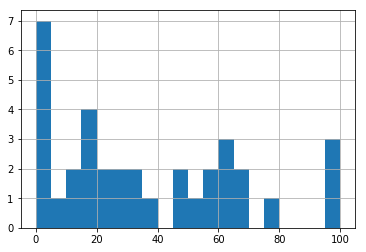

In [369]:
aff_per_district.Pct_New_Affordable_SF.hist(bins = 20)

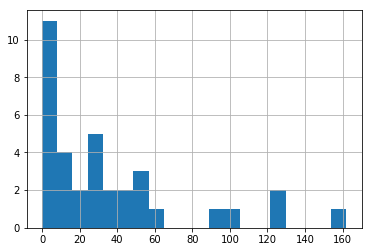

In [390]:
aff_per_district.New_Multi.hist(bins = 20)

In [385]:
aff_per_district.nsmallest(10, "Pct_New_Affordable_SF")

,Council District,count_2009,count_2013,count_2017,Change_2013_2017,Change_2009_2017,Change_2009_2013,Pct_Change_2013_2017,New_Affordable_SF,New_SF,Pct_New_Affordable_SF,New_Multi,Demo_SF,Demo_Affordable_SF,Demo_Multi,Pct_Affordable_Demo
17,18.0,1017,916,707,-209,-310,-101,-0.228166,0,21,0.000000,28,36,0,19,0.000000
18,19.0,3349,2731,1216,-1515,-2133,-618,-0.554742,0,88,0.000000,59,91,15,28,16.483516
22,23.0,1288,1269,991,-278,-297,-19,-0.219070,0,26,0.000000,12,64,3,2,4.687500
23,24.0,2022,1917,801,-1116,-1221,-105,-0.582160,0,62,0.000000,15,128,5,39,3.906250
24,25.0,1023,1048,576,-472,-447,25,-0.450382,0,108,0.000000,28,165,9,64,5.454545
33,34.0,783,770,575,-195,-208,-13,-0.253247,0,45,0.000000,4,97,0,7,0.000000
34,35.0,2544,2342,995,-1347,-1549,-202,-0.575149,2,49,4.081633,16,7,0,4,0.000000
6,7.0,5758,5492,2903,-2589,-2855,-266,-0.471413,12,158,7.594937,53,159,28,39,17.610063
5,6.0,3885,3154,1137,-2017,-2748,-731,-0.639505,15,116,12.931034,42,164,42,17,25.609756
16,17.0,2641,2267,1728,-539,-913,-374,-0.237759,27,182,14.835165,127,310,33,59,10.645161


23, 24, 25: All Green Hills/Brentwood/Vandy/Belmont/Hillsboro area

18: Music Row

19: Downtown/Germantown

34: Forest Hills/ Brentwood

6, 7: East Nashville, Inglewood

17: SE Downtown

In [384]:
aff_per_district.loc[aff_per_district.Pct_New_Affordable_SF == 0]

,Council District,count_2009,count_2013,count_2017,Change_2013_2017,Change_2009_2017,Change_2009_2013,Pct_Change_2013_2017,New_Affordable_SF,New_SF,Pct_New_Affordable_SF,New_Multi,Demo_SF,Demo_Affordable_SF,Demo_Multi,Pct_Affordable_Demo
17,18.0,1017,916,707,-209,-310,-101,-0.228166,0,21,0.0,28,36,0,19,0.000000
18,19.0,3349,2731,1216,-1515,-2133,-618,-0.554742,0,88,0.0,59,91,15,28,16.483516
22,23.0,1288,1269,991,-278,-297,-19,-0.219070,0,26,0.0,12,64,3,2,4.687500
23,24.0,2022,1917,801,-1116,-1221,-105,-0.582160,0,62,0.0,15,128,5,39,3.906250
24,25.0,1023,1048,576,-472,-447,25,-0.450382,0,108,0.0,28,165,9,64,5.454545
33,34.0,783,770,575,-195,-208,-13,-0.253247,0,45,0.0,4,97,0,7,0.000000


In [382]:
aff_per_district.nlargest(5, "Pct_New_Affordable_SF")

,Council District,count_2009,count_2013,count_2017,Change_2013_2017,Change_2009_2017,Change_2009_2013,Pct_Change_2013_2017,New_Affordable_SF,New_SF,Pct_New_Affordable_SF,New_Multi,Demo_SF,Demo_Affordable_SF,Demo_Multi,Pct_Affordable_Demo
29,30.0,3722,3757,3651,-106,-71,35,-0.028214,3,3,100.000000,0,2,0,1,0.000000
8,9.0,4652,4649,4604,-45,-48,-3,-0.009680,24,25,96.000000,28,33,9,8,27.272727
27,28.0,4231,4323,4334,11,103,92,0.002545,23,24,95.833333,32,3,1,3,33.333333
28,29.0,5639,5731,5574,-157,-65,92,-0.027395,10,13,76.923077,34,11,4,0,36.363636
32,33.0,6278,6551,6850,299,572,273,0.045642,215,320,67.187500,43,11,3,1,27.272727


27, 28, 29, 30, 33 : All SE of airport - Antioch area
9: Madison and SE - Neely's Bend (North of river)

In [372]:
aff_per_district.nlargest(10, 'New_Multi')

,Council District,count_2009,count_2013,count_2017,Change_2013_2017,Change_2009_2017,Change_2009_2013,Pct_Change_2013_2017,New_Affordable_SF,New_SF,Pct_New_Affordable_SF,New_Multi,Demo_SF,Demo_Affordable_SF,Demo_Multi,Pct_Affordable_Demo
19,20.0,4259,4165,3022,-1143,-1237,-94,-0.274430,69,273,25.274725,162,324,62,94,19.135802
16,17.0,2641,2267,1728,-539,-913,-374,-0.237759,27,182,14.835165,127,310,33,59,10.645161
31,32.0,2803,3088,3276,188,473,285,0.060881,82,133,61.654135,123,2,0,0,0.000000
21,22.0,5147,5218,3656,-1562,-1491,71,-0.299348,19,108,17.592593,100,8,1,1,12.500000
4,5.0,4451,4386,3011,-1375,-1440,-65,-0.313497,50,153,32.679739,91,163,39,47,23.926380
18,19.0,3349,2731,1216,-1515,-2133,-618,-0.554742,0,88,0.000000,59,91,15,28,16.483516
6,7.0,5758,5492,2903,-2589,-2855,-266,-0.471413,12,158,7.594937,53,159,28,39,17.610063
13,14.0,4011,4334,4301,-33,290,323,-0.007614,19,103,18.446602,50,6,0,4,0.000000
10,11.0,5832,5871,5642,-229,-190,39,-0.039005,35,62,56.451613,49,16,8,9,50.000000
32,33.0,6278,6551,6850,299,572,273,0.045642,215,320,67.187500,43,11,3,1,27.272727


20 and 22 : West along I-40 

5: East Nashville along river

7: Inglewood

32, 33: Antioch

17: SE of downtown along Nolensville Pike

19: downtown

11: Old Hickory

14: NE of airport

In [373]:
aff_per_district.nlargest(5, 'Demo_SF')

,Council District,count_2009,count_2013,count_2017,Change_2013_2017,Change_2009_2017,Change_2009_2013,Pct_Change_2013_2017,New_Affordable_SF,New_SF,Pct_New_Affordable_SF,New_Multi,Demo_SF,Demo_Affordable_SF,Demo_Multi,Pct_Affordable_Demo
19,20.0,4259,4165,3022,-1143,-1237,-94,-0.274430,69,273,25.274725,162,324,62,94,19.135802
16,17.0,2641,2267,1728,-539,-913,-374,-0.237759,27,182,14.835165,127,310,33,59,10.645161
24,25.0,1023,1048,576,-472,-447,25,-0.450382,0,108,0.000000,28,165,9,64,5.454545
5,6.0,3885,3154,1137,-2017,-2748,-731,-0.639505,15,116,12.931034,42,164,42,17,25.609756
4,5.0,4451,4386,3011,-1375,-1440,-65,-0.313497,50,153,32.679739,91,163,39,47,23.926380


20: West Nashville (the nations) - Notice a large number of multifamily homes going up 



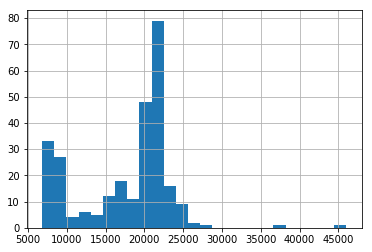

In [374]:
new_res_sf.loc[(new_res_sf['Council District'] == 20)].Mortgage_Per_Year_2017.hist(bins = 25)

In [375]:
new_res_sf.loc[(new_res_sf['Council District'] == 20) & (new_res_sf.Mortgage_Per_Year_2017 < 5000)][['AddressFullAddress','2017 LAND',
       '2017 IMPR', '2017 TOTAL APPR', '2017 TOTAL ASSD', '2017_FinishedArea']].sort_values('2017 IMPR')

,AddressFullAddress,2017 LAND,2017 IMPR,2017 TOTAL APPR,2017 TOTAL ASSD,2017_FinishedArea


In [379]:
aff_per_district.nlargest(10, 'New_SF')

,Council District,count_2009,count_2013,count_2017,Change_2013_2017,Change_2009_2017,Change_2009_2013,Pct_Change_2013_2017,New_Affordable_SF,New_SF,Pct_New_Affordable_SF,New_Multi,Demo_SF,Demo_Affordable_SF,Demo_Multi,Pct_Affordable_Demo
32,33.0,6278,6551,6850,299,572,273,0.045642,215,320,67.187500,43,11,3,1,27.272727
19,20.0,4259,4165,3022,-1143,-1237,-94,-0.274430,69,273,25.274725,162,324,62,94,19.135802
16,17.0,2641,2267,1728,-539,-913,-374,-0.237759,27,182,14.835165,127,310,33,59,10.645161
30,31.0,4893,5158,4117,-1041,-776,265,-0.201822,37,167,22.155689,8,8,1,2,12.500000
6,7.0,5758,5492,2903,-2589,-2855,-266,-0.471413,12,158,7.594937,53,159,28,39,17.610063
4,5.0,4451,4386,3011,-1375,-1440,-65,-0.313497,50,153,32.679739,91,163,39,47,23.926380
31,32.0,2803,3088,3276,188,473,285,0.060881,82,133,61.654135,123,2,0,0,0.000000
1,2.0,4260,4274,4198,-76,-62,14,-0.017782,59,121,48.760331,21,129,25,20,19.379845
5,6.0,3885,3154,1137,-2017,-2748,-731,-0.639505,15,116,12.931034,42,164,42,17,25.609756
21,22.0,5147,5218,3656,-1562,-1491,71,-0.299348,19,108,17.592593,100,8,1,1,12.500000


In [386]:
final_sf.loc[final_sf.Mortgage_Per_Year_2017 < 24480].shape[0]

173564

In [387]:
final_sf.loc[final_sf.Mortgage_Per_Year_2017 > 0].shape[0]

197589

In [388]:
final_sf.loc[(final_sf.Mortgage_Per_Year_2017 < 24480) & (final_sf.Mortgage_Per_Year_2017 > 12240)].shape[0]

63571